### Supervised Learning: K-Means Clustering
- Date: 26-Aug-23
- Dataset: BaskinRobbins 
- Learning Date: 22-Aug-23
- Learning from: Prasert Kanawattanachai (CBS)
    - Github: https://github.com/prasertcbs/


In [23]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [24]:
# read data to a dataframe

df = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/BaskinRobbins.tsv', sep = '\t')
df.sample(5)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Sugar Alcohol (g)
16,Chocolate Mousse Royale,180,11.0,0.2,18,13,3.0,NaN
51,Raspberry Cheese Louise,220,9.0,0.3,30,24,5.0,NaN
37,Mint Chocolate Chip,240,15.0,0.5,23,18,5.0,NaN
32,Mango Mania,130,6.0,0.2,17,14,2.0,NaN
53,Reese® NHL® Power Play,330,21.0,0.4,30,23,8.0,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
 7   Sugar Alcohol (g)  3 non-null      float64
dtypes: float64(4), int64(3), object(1)
memory usage: 4.5+ KB


In [26]:
df.drop(columns = ['Sugar Alcohol (g)'], inplace = True)
df.head(3)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0
1,Baseball Nut,160,9.0,0.2,19,13,3.0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0


In [27]:
df.shape

(70, 7)

In [28]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [29]:
cols = ['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
cols

['Calories',
 'Total Fat (g)',
 'Trans Fat (g)',
 'Carbohydrates (g)',
 'Sugars (g)',
 'Protein (g)']

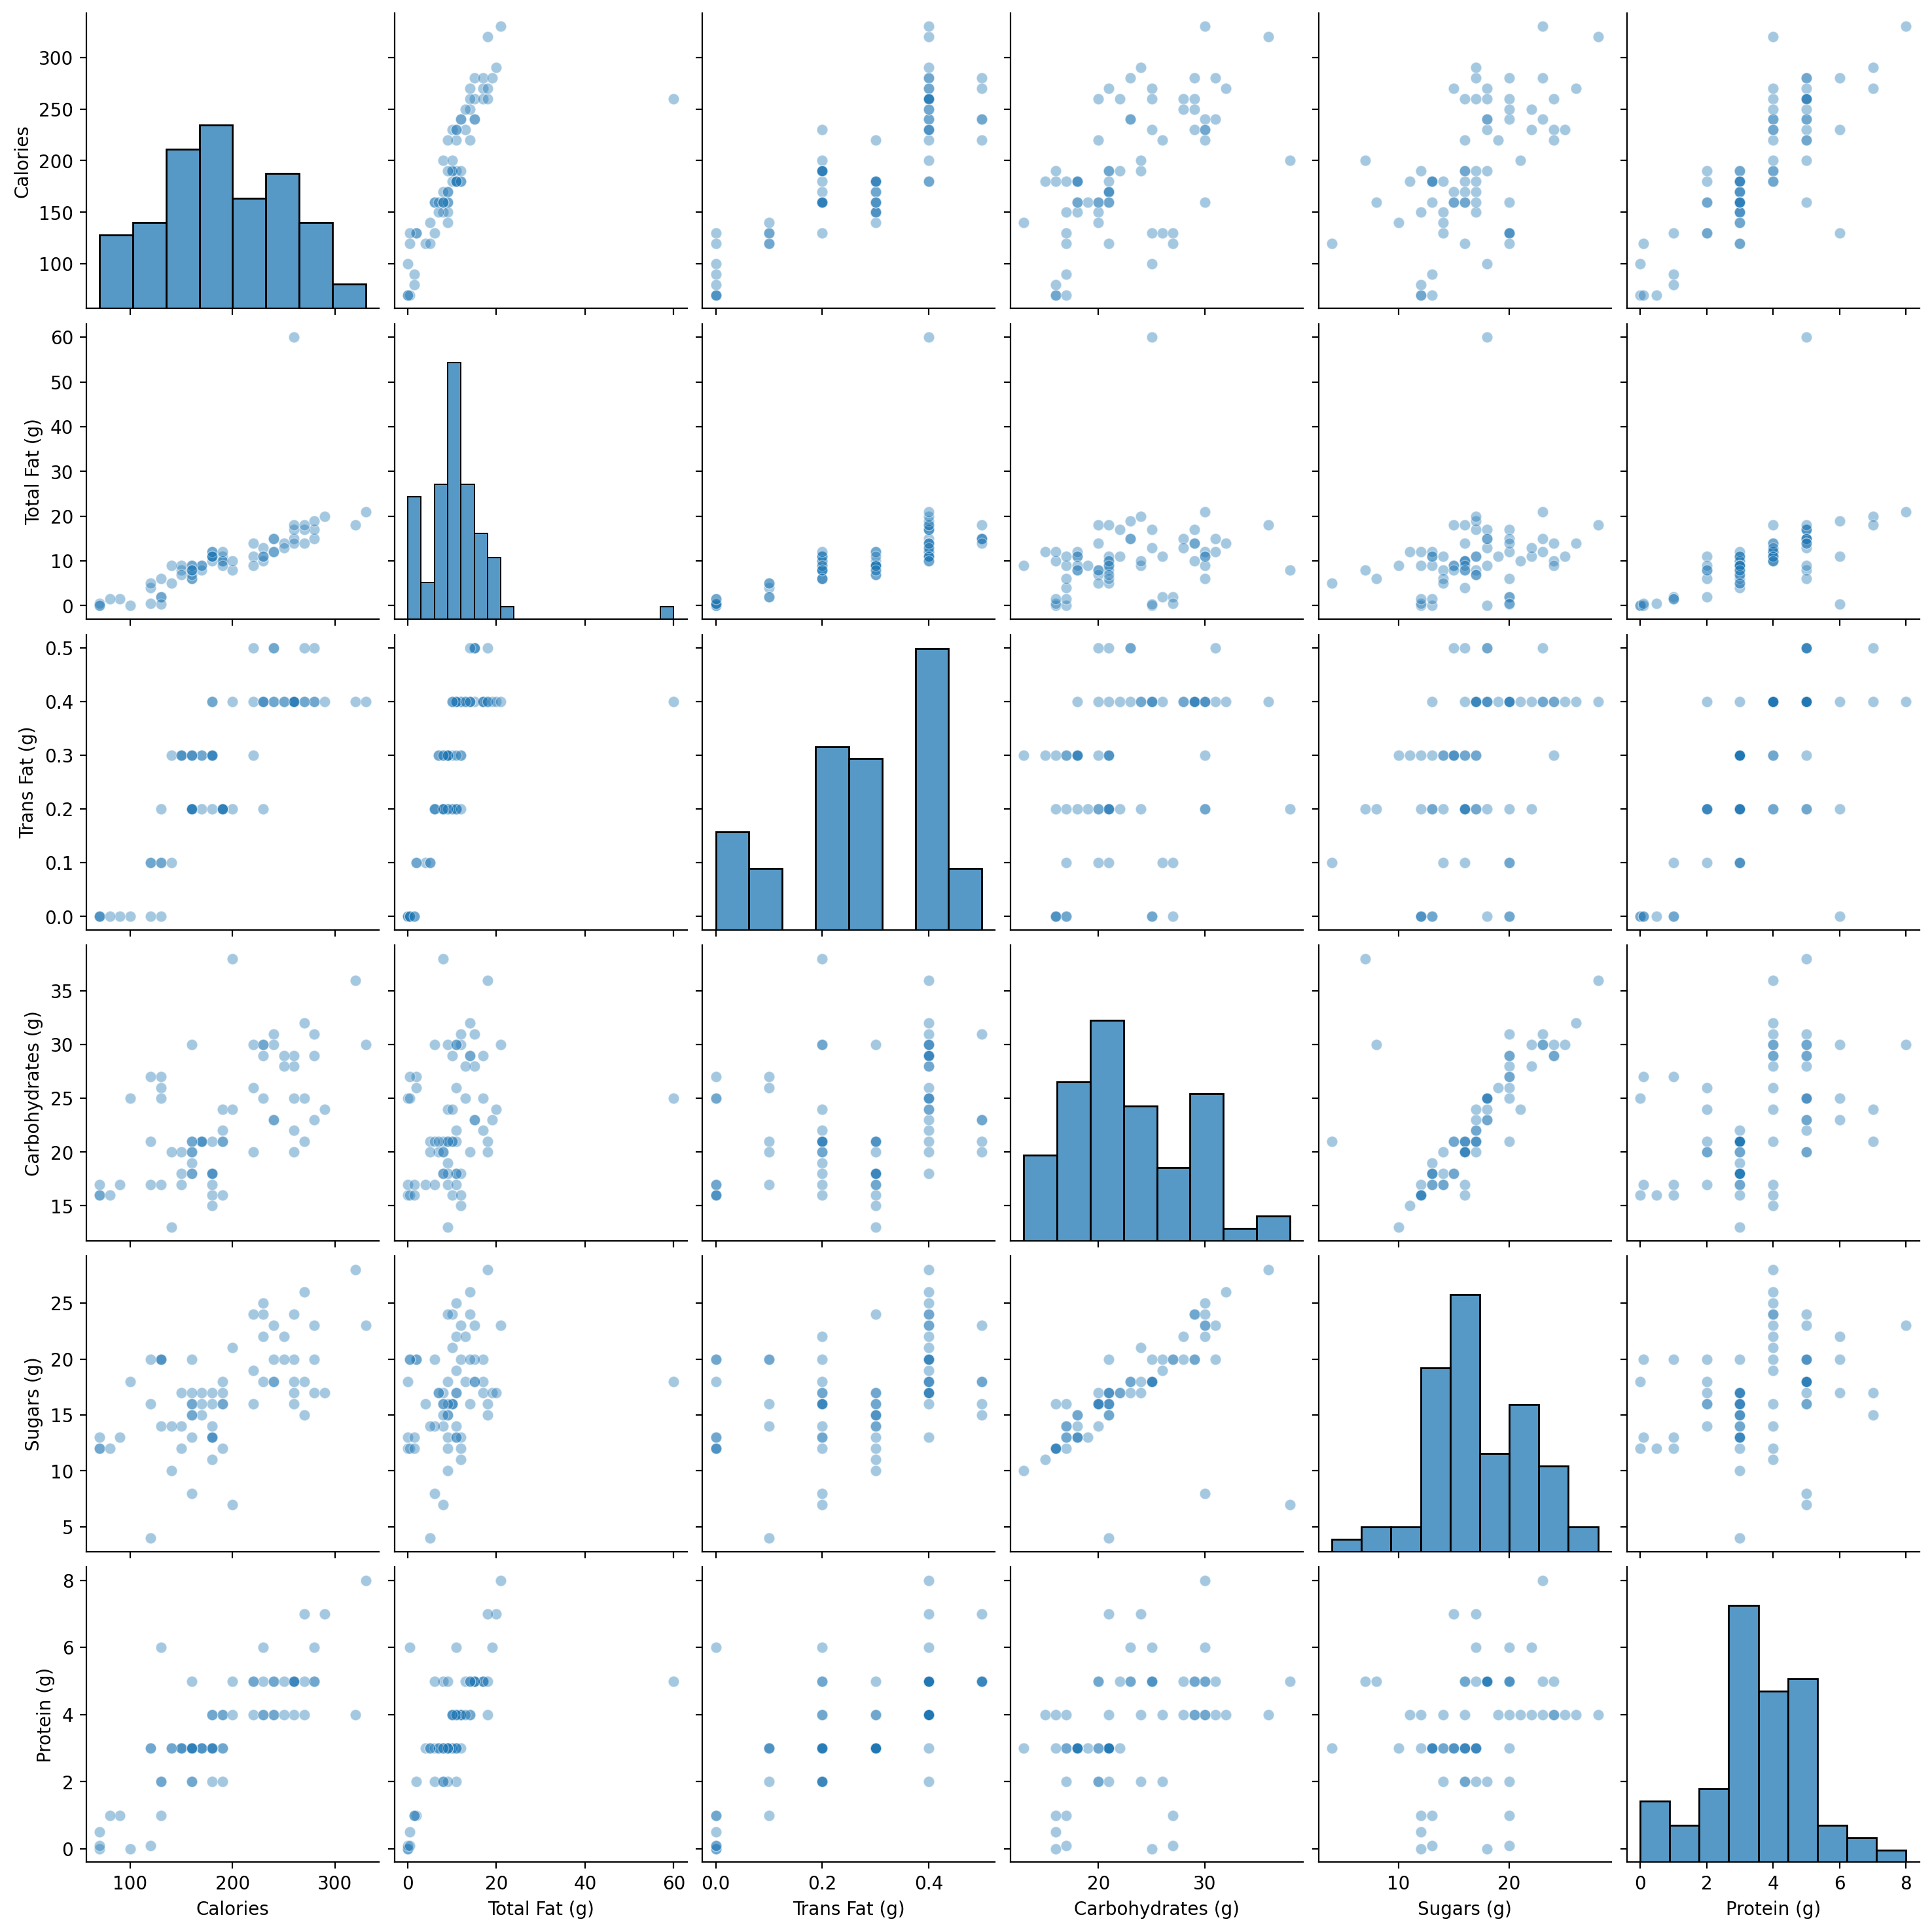

In [30]:
# plot

sns.pairplot(df, vars= cols, plot_kws = {'alpha': .4});

### Scikit-learn: KMeans Clustering

In [31]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [32]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [33]:
cols = ['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
cols

['Calories',
 'Total Fat (g)',
 'Trans Fat (g)',
 'Carbohydrates (g)',
 'Sugars (g)',
 'Protein (g)']

In [34]:
## z-score

scaler = preprocessing.StandardScaler() # create StandardScaler intance
z = scaler.fit_transform(df[cols]) # calc z-score
z[: 5].round(4) # 2D numpy array

array([[-0.5182, -0.3248, -0.5335, -0.5358, -0.2048, -0.94  ],
       [-0.5182, -0.1981, -0.5335, -0.7206, -0.8767, -0.3402],
       [-0.3548, -0.1981,  0.1581, -0.3511, -0.4287, -0.3402],
       [-1.1718, -0.8318, -1.2251, -1.0902, -0.2048, -0.3402],
       [-1.0084, -1.0852, -1.2251,  0.5728,  0.6911, -0.94  ]])

In [35]:
## Yeo-Johnson transformation (preferable)

pt = preprocessing.PowerTransformer(method = 'yeo-johnson', standardize = True) # support only positive valve
mat = pt.fit_transform(df[cols])
mat[:5].round(4)

array([[-0.4998, -0.1914, -0.644 , -0.4474, -0.2191, -0.9432],
       [-0.4998, -0.0397, -0.644 , -0.6723, -0.8836, -0.3465],
       [-0.3343, -0.0397,  0.0461, -0.2353, -0.4421, -0.3465],
       [-1.1757, -0.92  , -1.2227, -1.1663, -0.2191, -0.3465],
       [-1.0044, -1.417 , -1.2227,  0.6729,  0.6865, -0.9432]])

In [36]:
bc_cols = [f'bc_{c}' for c in cols]
bc_cols

['bc_Calories',
 'bc_Total Fat (g)',
 'bc_Trans Fat (g)',
 'bc_Carbohydrates (g)',
 'bc_Sugars (g)',
 'bc_Protein (g)']

In [37]:
z_cols = [f'z_{c}' for c in cols]
z_cols

['z_Calories',
 'z_Total Fat (g)',
 'z_Trans Fat (g)',
 'z_Carbohydrates (g)',
 'z_Sugars (g)',
 'z_Protein (g)']

In [38]:
ds = pd.concat([df, pd.DataFrame(mat, columns = bc_cols), pd.DataFrame(z, columns = z_cols)], axis = 'columns')
ds.head(3)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),bc_Calories,bc_Total Fat (g),bc_Trans Fat (g),bc_Carbohydrates (g),bc_Sugars (g),bc_Protein (g),z_Calories,z_Total Fat (g),z_Trans Fat (g),z_Carbohydrates (g),z_Sugars (g),z_Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181,-0.518194,-0.324811,-0.533530,-0.535844,-0.204771,-0.94002
1,Baseball Nut,160,9.0,0.2,19,13,3.0,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462,-0.518194,-0.198073,-0.533530,-0.720618,-0.876675,-0.34019
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462,-0.354799,-0.198073,0.158083,-0.351070,-0.428739,-0.34019


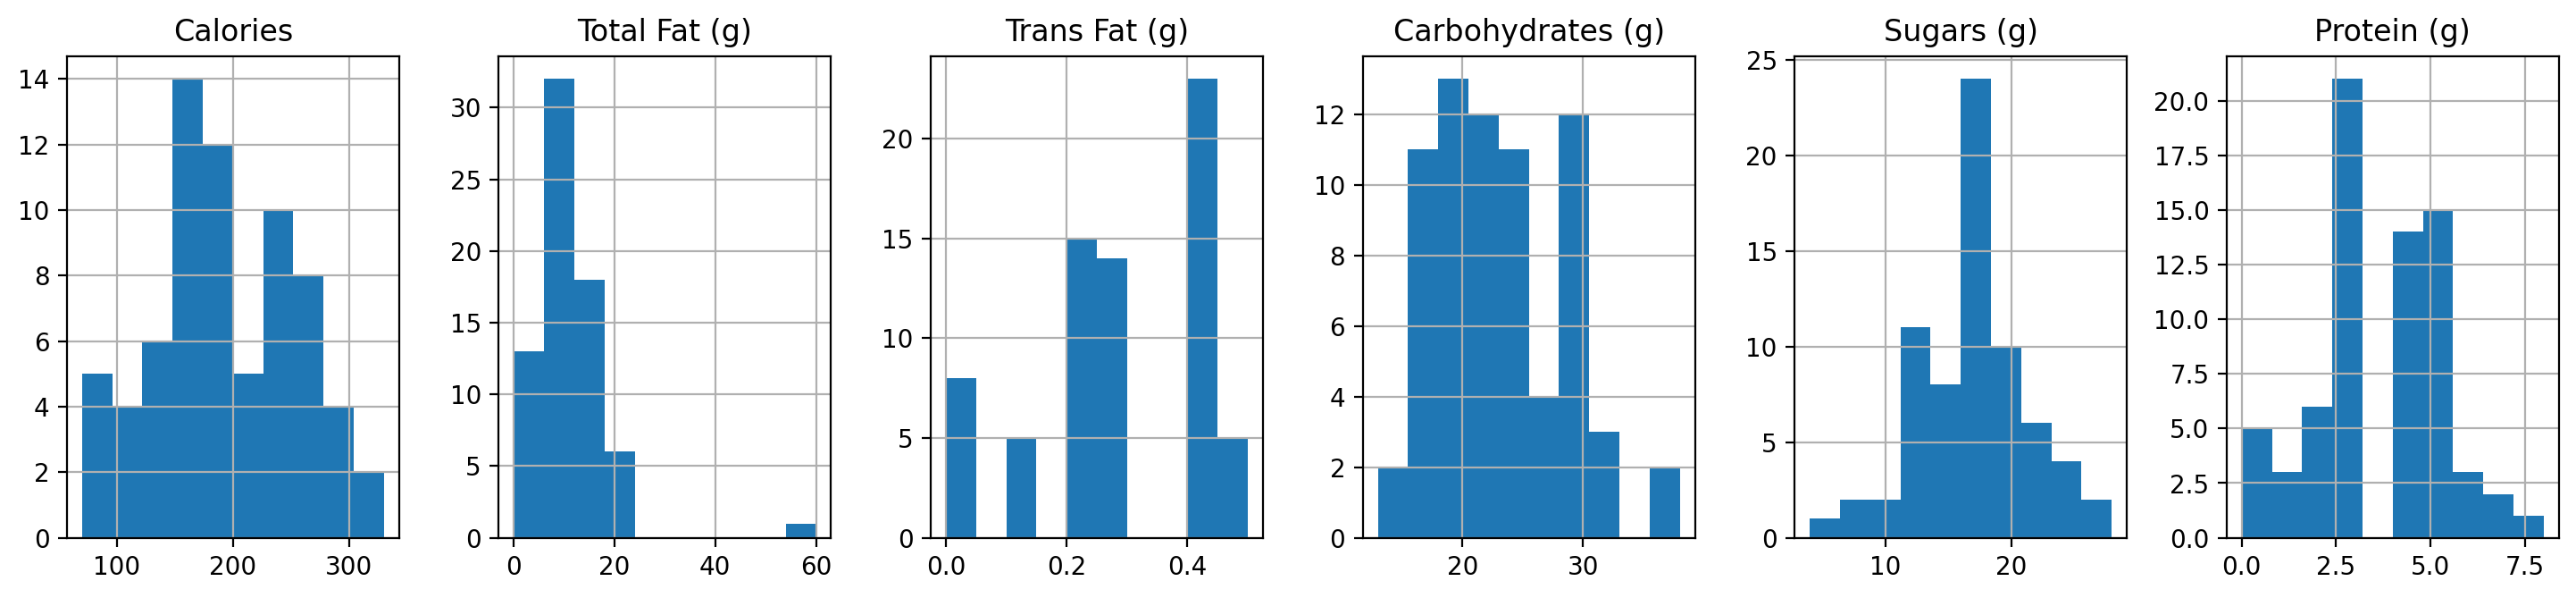

In [39]:
ds[cols].hist(layout = (1, len(cols)), figsize = (3*len(cols), 3.5));

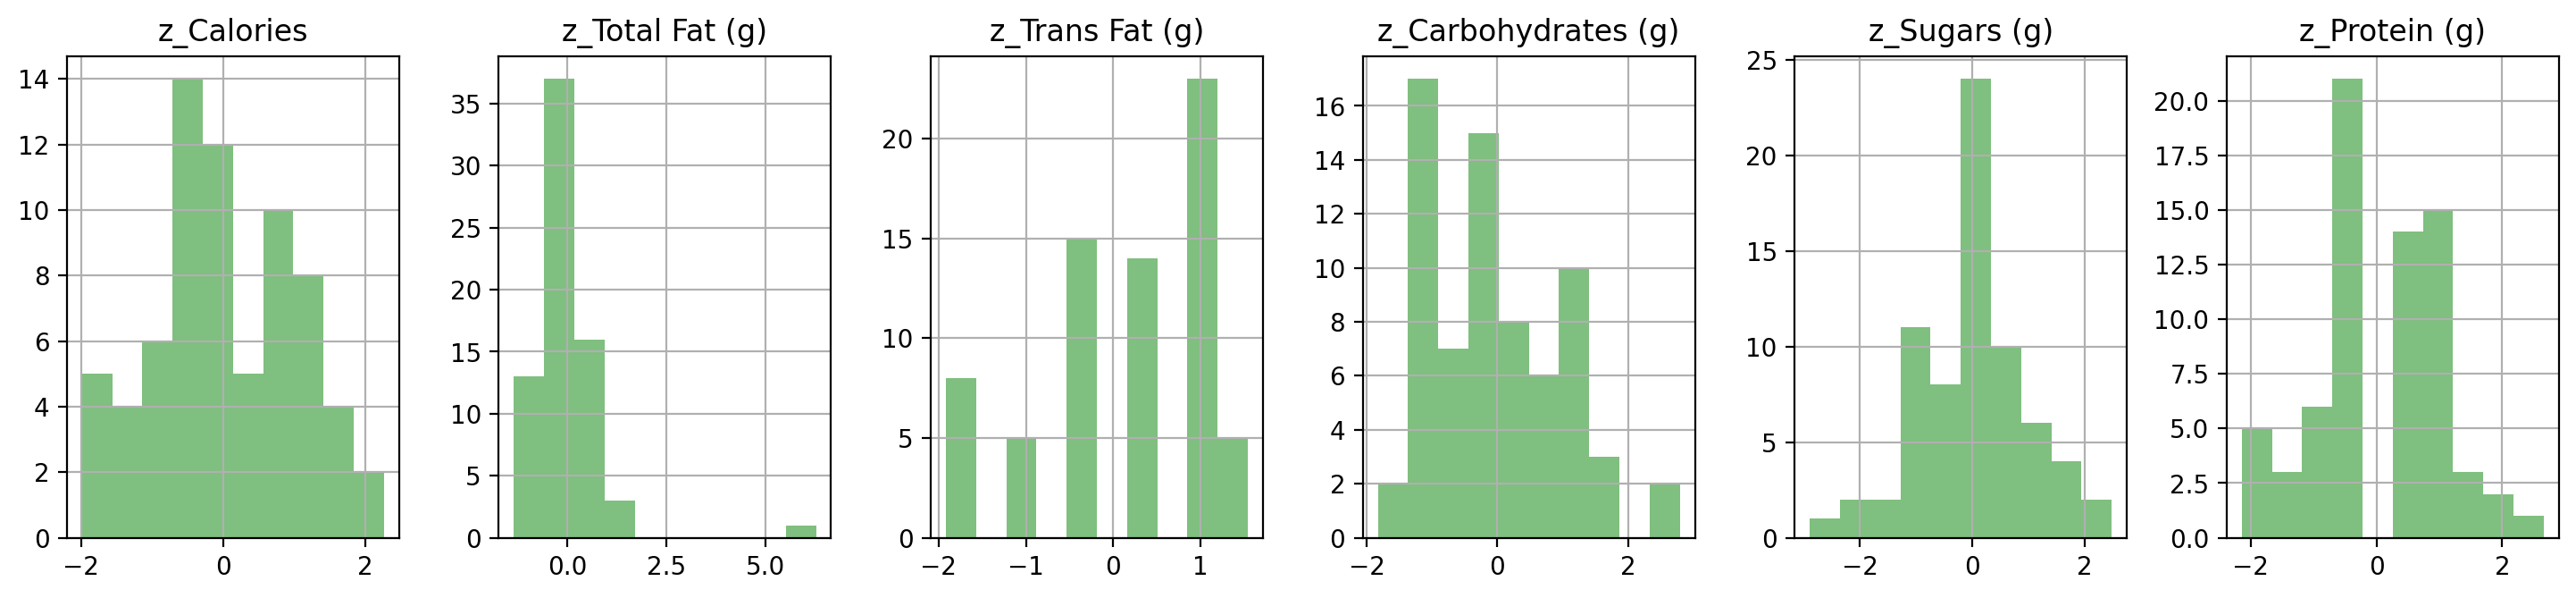

In [40]:
ds[z_cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5), color = 'green', alpha = .5);

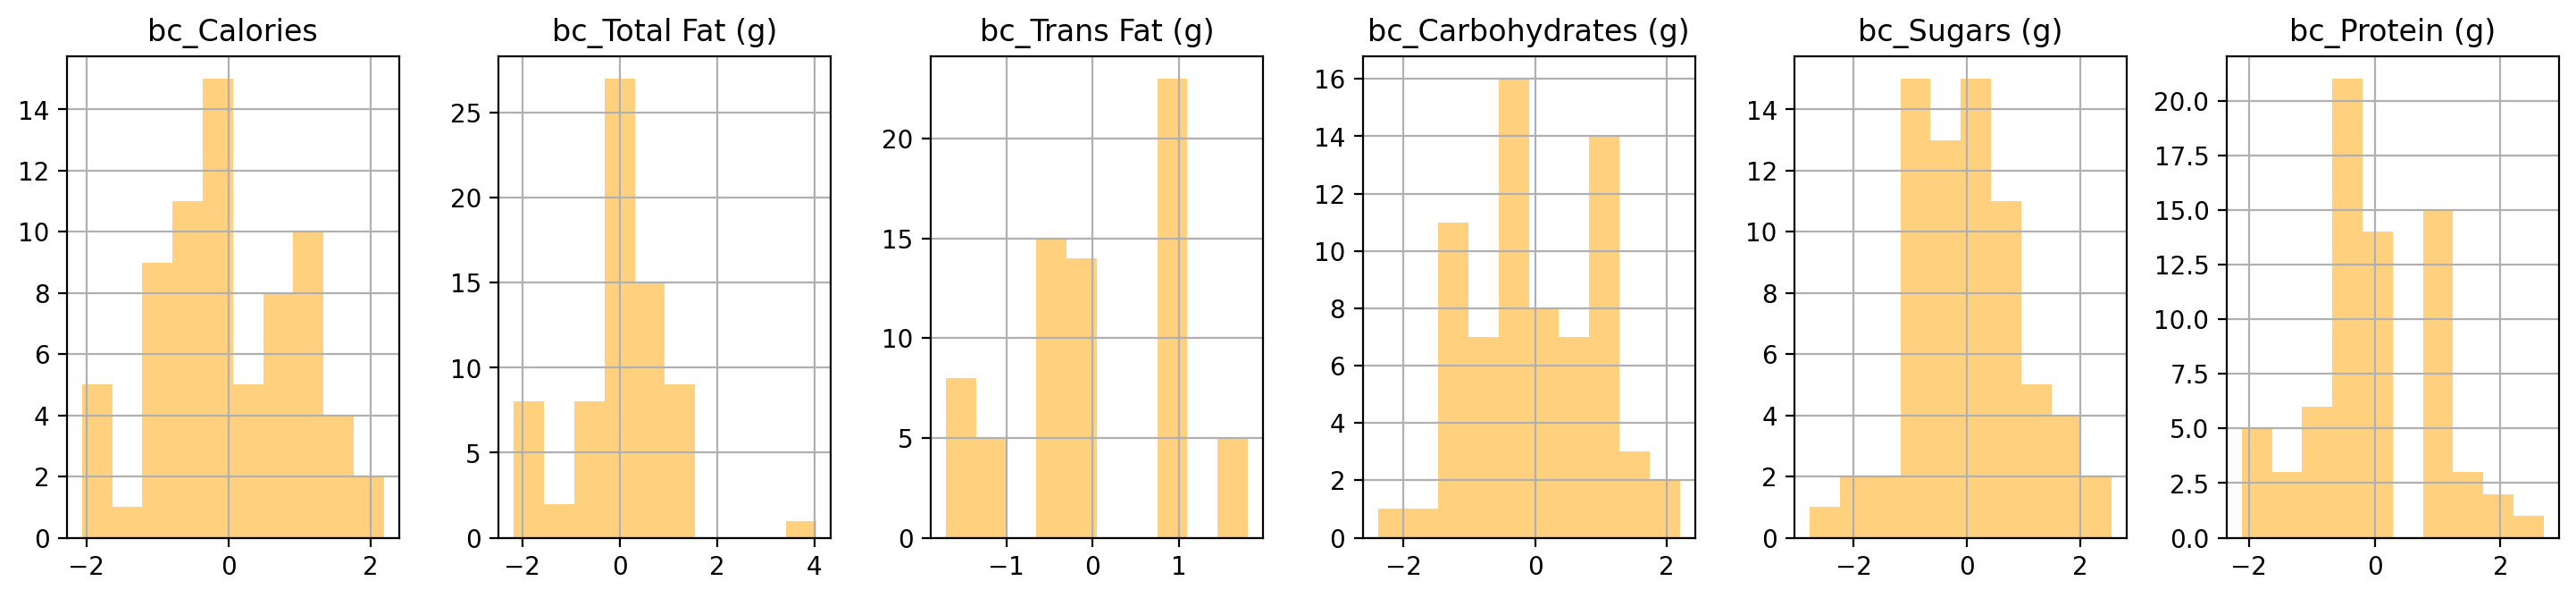

In [41]:
ds[bc_cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5), color = 'orange', alpha = .5);

In [42]:
X = pd.DataFrame(mat, columns = cols) ## power transformation (preferable)
# X = pd.DataFrame(z, columns=cols) ## z-score
X.head(3)

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462


### Scatter matrix with transformed data

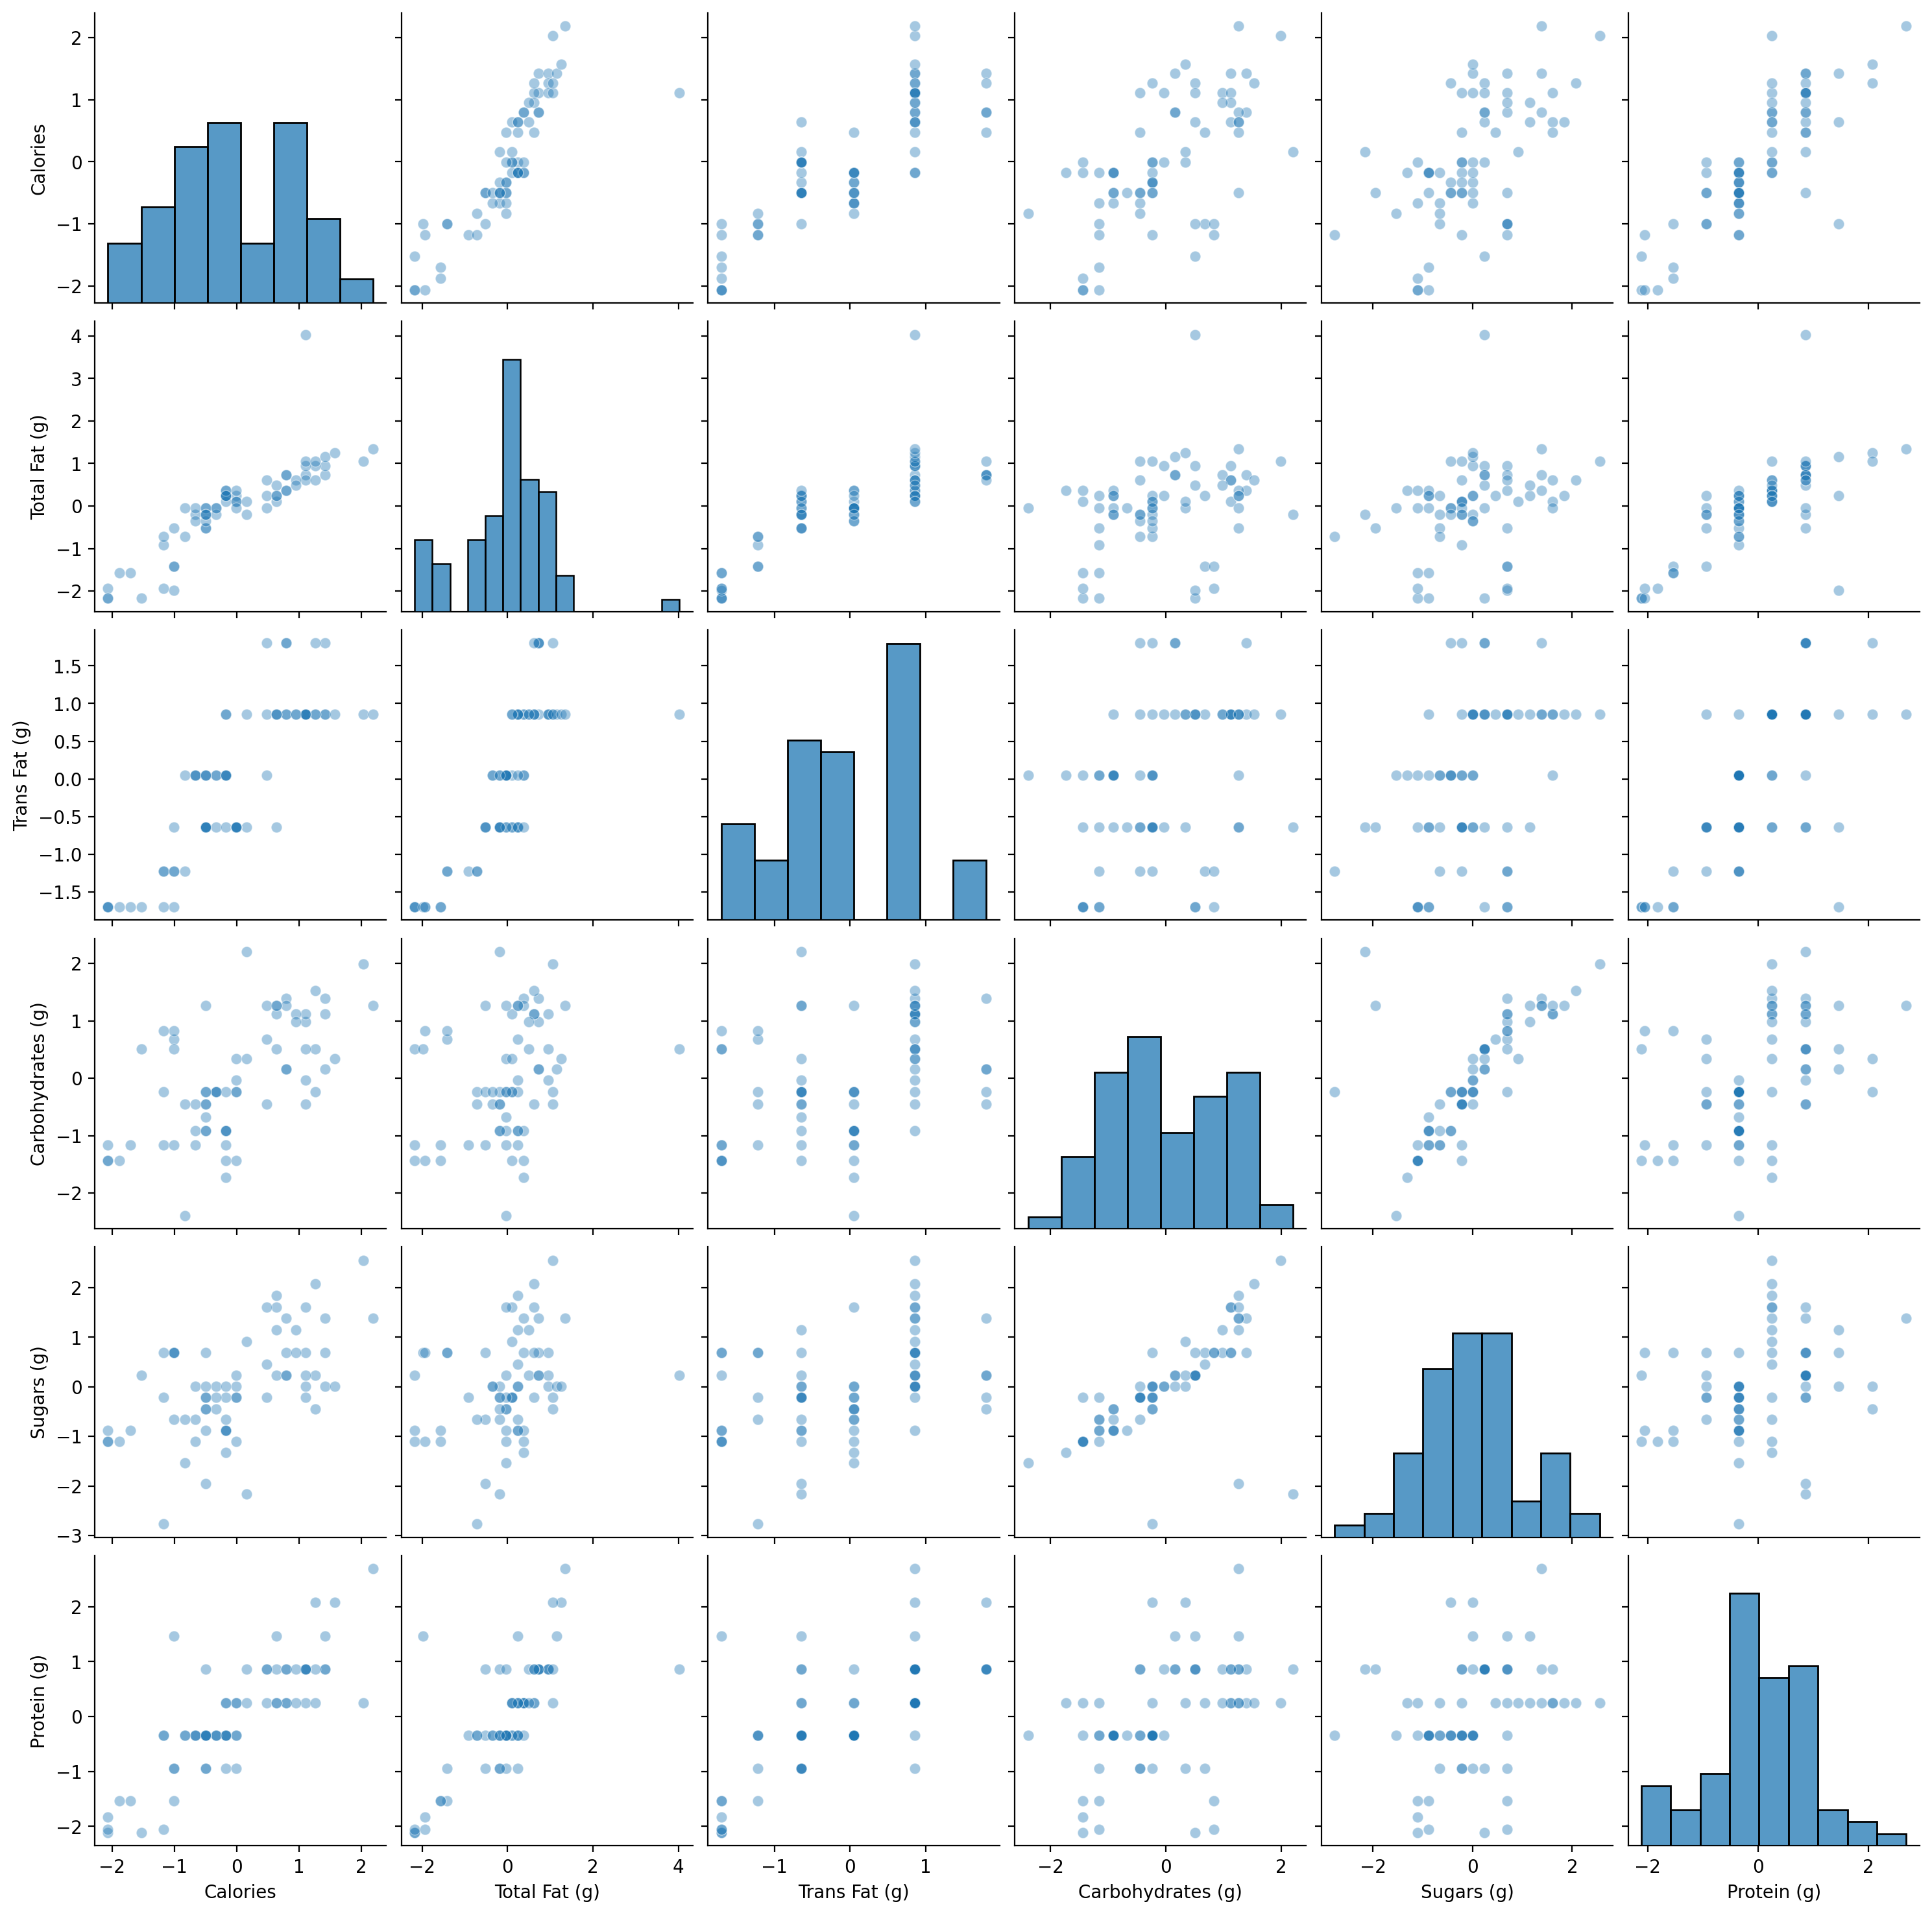

In [43]:
sns.pairplot(X, plot_kws = {'alpha': .4});

### Scikit-learn: Kmeans Clustering

In [45]:
from sklearn.cluster import KMeans

#### Optimal number of clusters

In [47]:
ssd = []

for k in range(2, 10):

    m = KMeans(n_clusters = k) # create a model
    m.fit(X) # train model
    ssd.append([k, m.inertia_])

ssd

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

[[2, 212.64279101233655],
 [3, 155.97536056103013],
 [4, 131.63637268024962],
 [5, 112.13385420919626],
 [6, 92.69325077592073],
 [7, 81.51738526057835],
 [8, 71.40067104934803],
 [9, 63.387223791599716]]

In [48]:
xy = np.array(ssd)
xy

array([[  2.        , 212.64279101],
       [  3.        , 155.97536056],
       [  4.        , 131.63637268],
       [  5.        , 112.13385421],
       [  6.        ,  92.69325078],
       [  7.        ,  81.51738526],
       [  8.        ,  71.40067105],
       [  9.        ,  63.38722379]])

In [49]:
print(xy)

[[  2.         212.64279101]
 [  3.         155.97536056]
 [  4.         131.63637268]
 [  5.         112.13385421]
 [  6.          92.69325078]
 [  7.          81.51738526]
 [  8.          71.40067105]
 [  9.          63.38722379]]


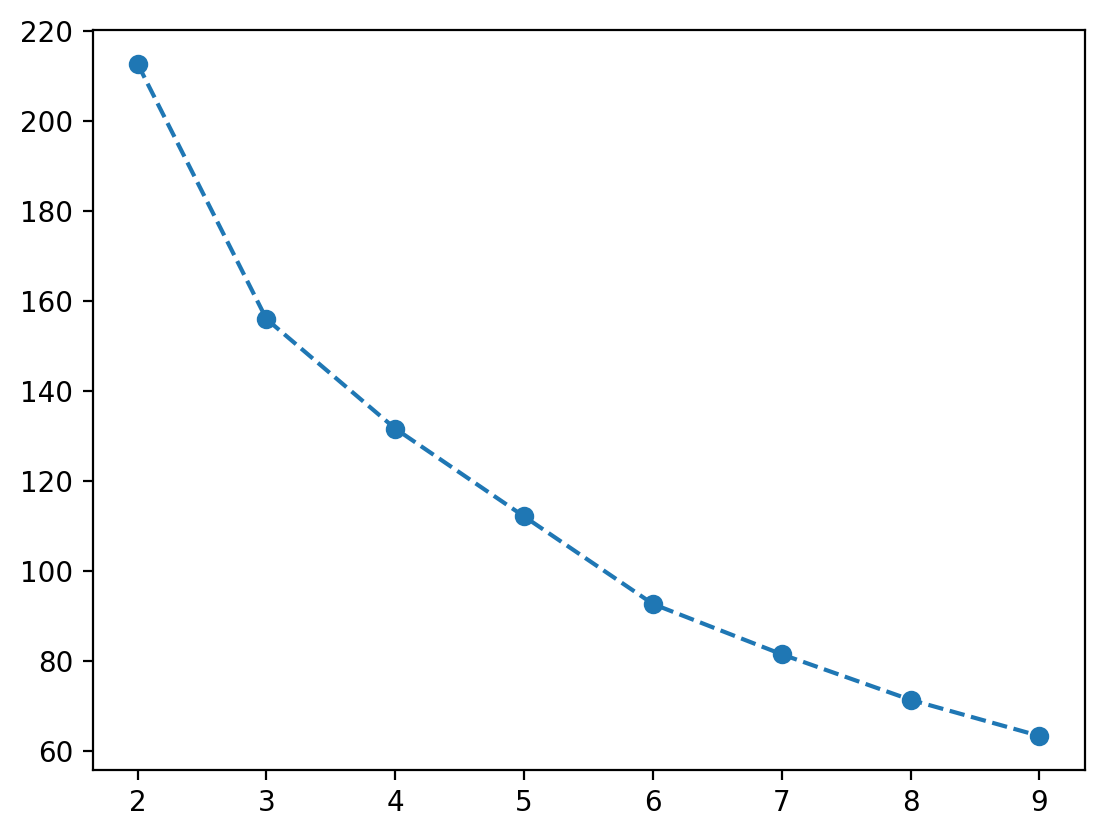

In [50]:
plt.plot(xy[:, 0], xy[:, 1], linestyle = '--', marker = 'o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')

In [51]:
dd = pd.DataFrame(ssd, columns = ['k', 'ssd'])
dd

,k,ssd
0,2,212.642791
1,3,155.975361
2,4,131.636373
3,5,112.133854
4,6,92.693251
5,7,81.517385
6,8,71.400671
7,9,63.387224


In [52]:
# add a new columns for percentage change

dd['pct_chg'] = dd['ssd'].pct_change() * 100
dd

,k,ssd,pct_chg
0,2,212.642791,NaN
1,3,155.975361,-26.649119
2,4,131.636373,-15.604380
3,5,112.133854,-14.815448
4,6,92.693251,-17.336962
5,7,81.517385,-12.056828
6,8,71.400671,-12.410499
7,9,63.387224,-11.223210


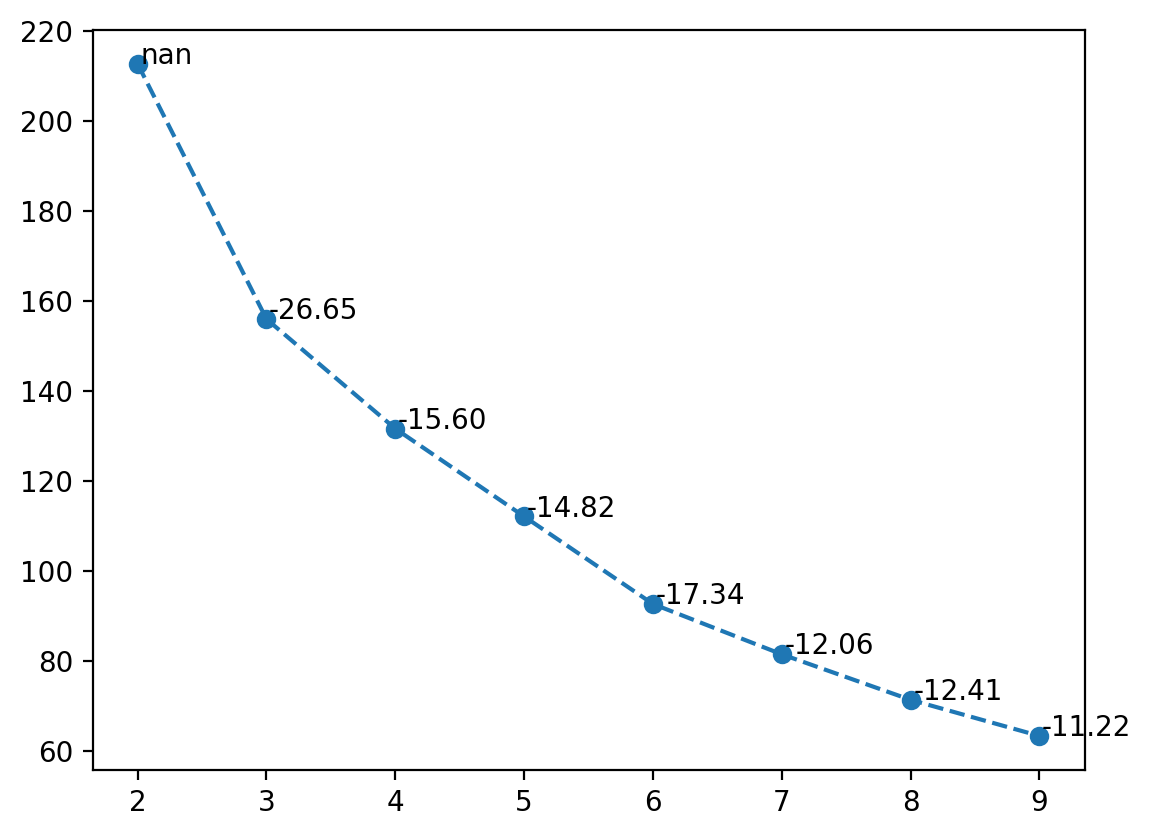

In [53]:
plt.plot(dd['k'], dd['ssd'], linestyle = '--', marker = 'o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')
for index, row in dd.iterrows():
    plt.text(row['k'] + .02, row['ssd'] + .02, f'{row["pct_chg"]:.2f}', fontsize = 10)